# Interpolation

This notebook uses the [Interpolations](https://github.com/JuliaMath/Interpolations.jl) package. As an alternative, you may consider [Dierckx](https://github.com/kbarbary/Dierckx.jl).

# Load Packages

In [1]:
using Dates, Interpolations

include("printmat.jl")  

printyellow (generic function with 1 method)

In [2]:
using Plots

#pyplot(size=(600,400))    
gr(size=(480,320))
default(fmt = :svg)

# Interpolation of y = f(x)

Interpolations are particularly useful when we repeatedly want to evaluate a function $f(x)$, or when we only know $f(x)$ for a grid of $x$ values but we have strong beliefs that the function is pretty smooth. We then do something like this:

1. Calculate $f(x)$ values for a grid of $x$. This creates a "look-up" table.
2. Replace the expensive calculations of $f(x_i)$ by interpolating $f(x_i)$ from the "look-up" table.

## Some Values to Be Interpolated

As a simple illustration, we interpolate the sine function. (In practice, the interpolation technique is typically applied to more complicated functions.)

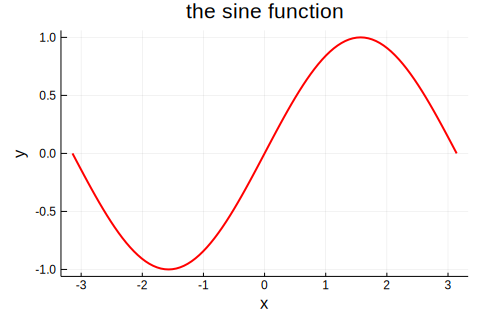

In [3]:
xGrid = range(-pi,stop=pi,length=101)  #uniformly spaced grid
yGrid = sin.(xGrid)                    #y values at xGrid 

p1 = plot(xGrid,yGrid,color=:red,linewidth=2,legend=nothing)
title!("the sine function")
xlabel!("x")
ylabel!("y")

## Interpolate

The next cell calls on `CubicSplineInterpolation()` to create the "look-up" table (more precisely, create an interpolation object). 

To use a cublic spline it is required that the $x_i$ grid is *uniformly spaced* (for instance, 0.1,0.2,...). The case of a non-uniformly spaced $x$ grid is discussed later.

The option `extrapolation_bc=...` determines how extrapolation beyond the range of the $x_i$ grid is done.

The second cell interpolates and extrapolates $y$ at some specific $x$ values. 

In [4]:
itp = CubicSplineInterpolation(xGrid,yGrid,extrapolation_bc=Flat())

println()

In [5]:
x  = [0.25,0.75]                     #to interpolate the y values at

y_interpolated = itp(x) 
                         
println("x, interpolated y values and true y values")
printmat([x y_interpolated sin.(x)])


x2             = [1.25,pi+0.1,pi+0.5]            #to extrapolate the y values at
y_extrapolated = itp(x2)                         #"extrapolation" can be done
                                                 #inside and outside the range xGrid
println("x2 and extrapolated values")
printmat([x2 y_extrapolated])

x, interpolated y values and true y values
     0.250     0.247     0.247
     0.750     0.682     0.682

x2 and extrapolated values
     1.250     0.949
     3.242     0.000
     3.642     0.000



## Plotting the Results

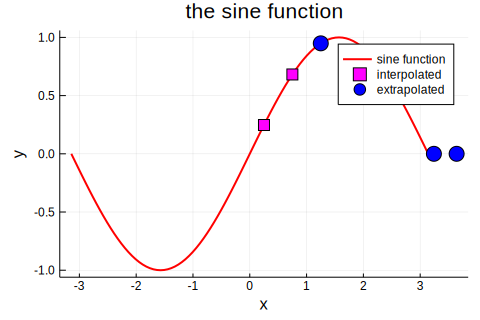

In [6]:
p1 = plot(xGrid,yGrid,color=:red,linewidth=2,label="sine function")
scatter!(x,y_interpolated,color=:magenta,markersize=5,marker=:square,label="interpolated")
scatter!(x2,y_extrapolated,color=:blue,markersize=8,label="extrapolated")
title!("the sine function")
xlabel!("x")
ylabel!("y")

# Interpolation of y = f(x) for General Vectors

That is, when we cannot guarantee that the look-up table of $y_i=f(x_i)$ is from uniformly spaced $x_i$ values. This is useful, for instance, when we have empirical data on $(x_i,y_i)$.

The approach works similar to before, except that the `CubicSplineInterpolation` must be replaced by `LinearInterpolation`.

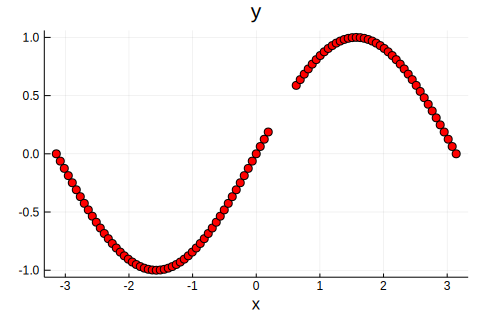

In [7]:
xGrid2 = deleteat!(collect(xGrid),55:60)         #non-uniformly spaced grid     
yGrid2 = sin.(xGrid2)

p1 = scatter(xGrid2,yGrid2,color=:red,legend=false)
title!("y")
xlabel!("x")

In [8]:
itp2 = LinearInterpolation(xGrid2,yGrid2,extrapolation_bc=Flat()) 
                                           
y_interpolated = itp2(x) 
                         
println("x, interpolated y values and true y values")
printmat([x y_interpolated sin.(x)])

y_extrapolated = itp2(x2)   
                            
println("x2 and extrapolated values")
printmat([x2 y_extrapolated])

x, interpolated y values and true y values
     0.250     0.243     0.247
     0.750     0.682     0.682

x2 and extrapolated values
     1.250     0.949
     3.242     0.000
     3.642     0.000

